In [2]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

**Import Dataset**

In [3]:
df = pd.read_csv("heart_v2.csv")

In [4]:
print(df.head())

   age  sex   BP  cholestrol  heart disease
0   70    1  130         322              1
1   67    0  115         564              0
2   57    1  124         261              1
3   64    1  128         263              0
4   74    0  120         269              0


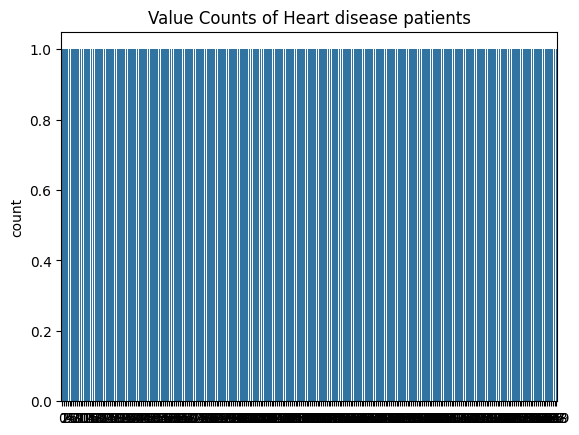

In [5]:
sns.countplot(df['heart disease'])
plt.title('Value Counts of Heart disease patients')
plt.show()

**Putting Feature Variable to X and Target variable to y**

In [6]:
# Putting feature variable to x
X = df.drop('heart disease', axis = 1)

# Putting response variable to y
y = df['heart disease']

**Train-Test-Split is performed**

In [7]:
# now lets split then into train and test 
from sklearn.model_selection import train_test_split

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, random_state = 42)
X_train.shape, X_test.shape

((189, 4), (81, 4))

**Let's import RandomForestClassifier and fit the data**

In [9]:
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier(random_state = 42, n_jobs = -1, max_depth = 5, n_estimators = 100, oob_score = True)

classifier_rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,True


In [10]:
# checking the oob score
classifier_rf.oob_score_

0.656084656084656

**Let's do hyperparameter tuning for Random Forest using GridSearchCV and fit the data**

In [16]:
rf = RandomForestClassifier(random_state = 42, n_jobs = -1)

params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_split':[5,10,20,50,100,200],
    'n_estimators':[10,25,30,50,100,200]
}

from sklearn.model_selection import GridSearchCV

# Instantiate the grid search model
grid_search = GridSearchCV (estimator = rf,
                            param_grid = params,
                            cv = 4,
                            n_jobs = -1, verbose = 1, scoring = "accuracy")

grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'max_depth': [2, 3, ...], 'min_samples_split': [5, 10, ...], 'n_estimators': [10, 25, ...]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,4
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,10


In [17]:
GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 50, 100, 200]},
             scoring='accuracy', verbose=1)


,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'max_depth': [2, 3, ...], 'min_samples_leaf': [5, 10, ...], 'n_estimators': [10, 25, ...]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,4
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,100


In [18]:
grid_search.best_score_

np.float64(0.7144281914893617)

In [19]:
rf_best = grid_search.best_estimator_
rf_best

,n_estimators,10
,criterion,'gini'
,max_depth,2
,min_samples_split,5
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


**Now, let’s visualize**

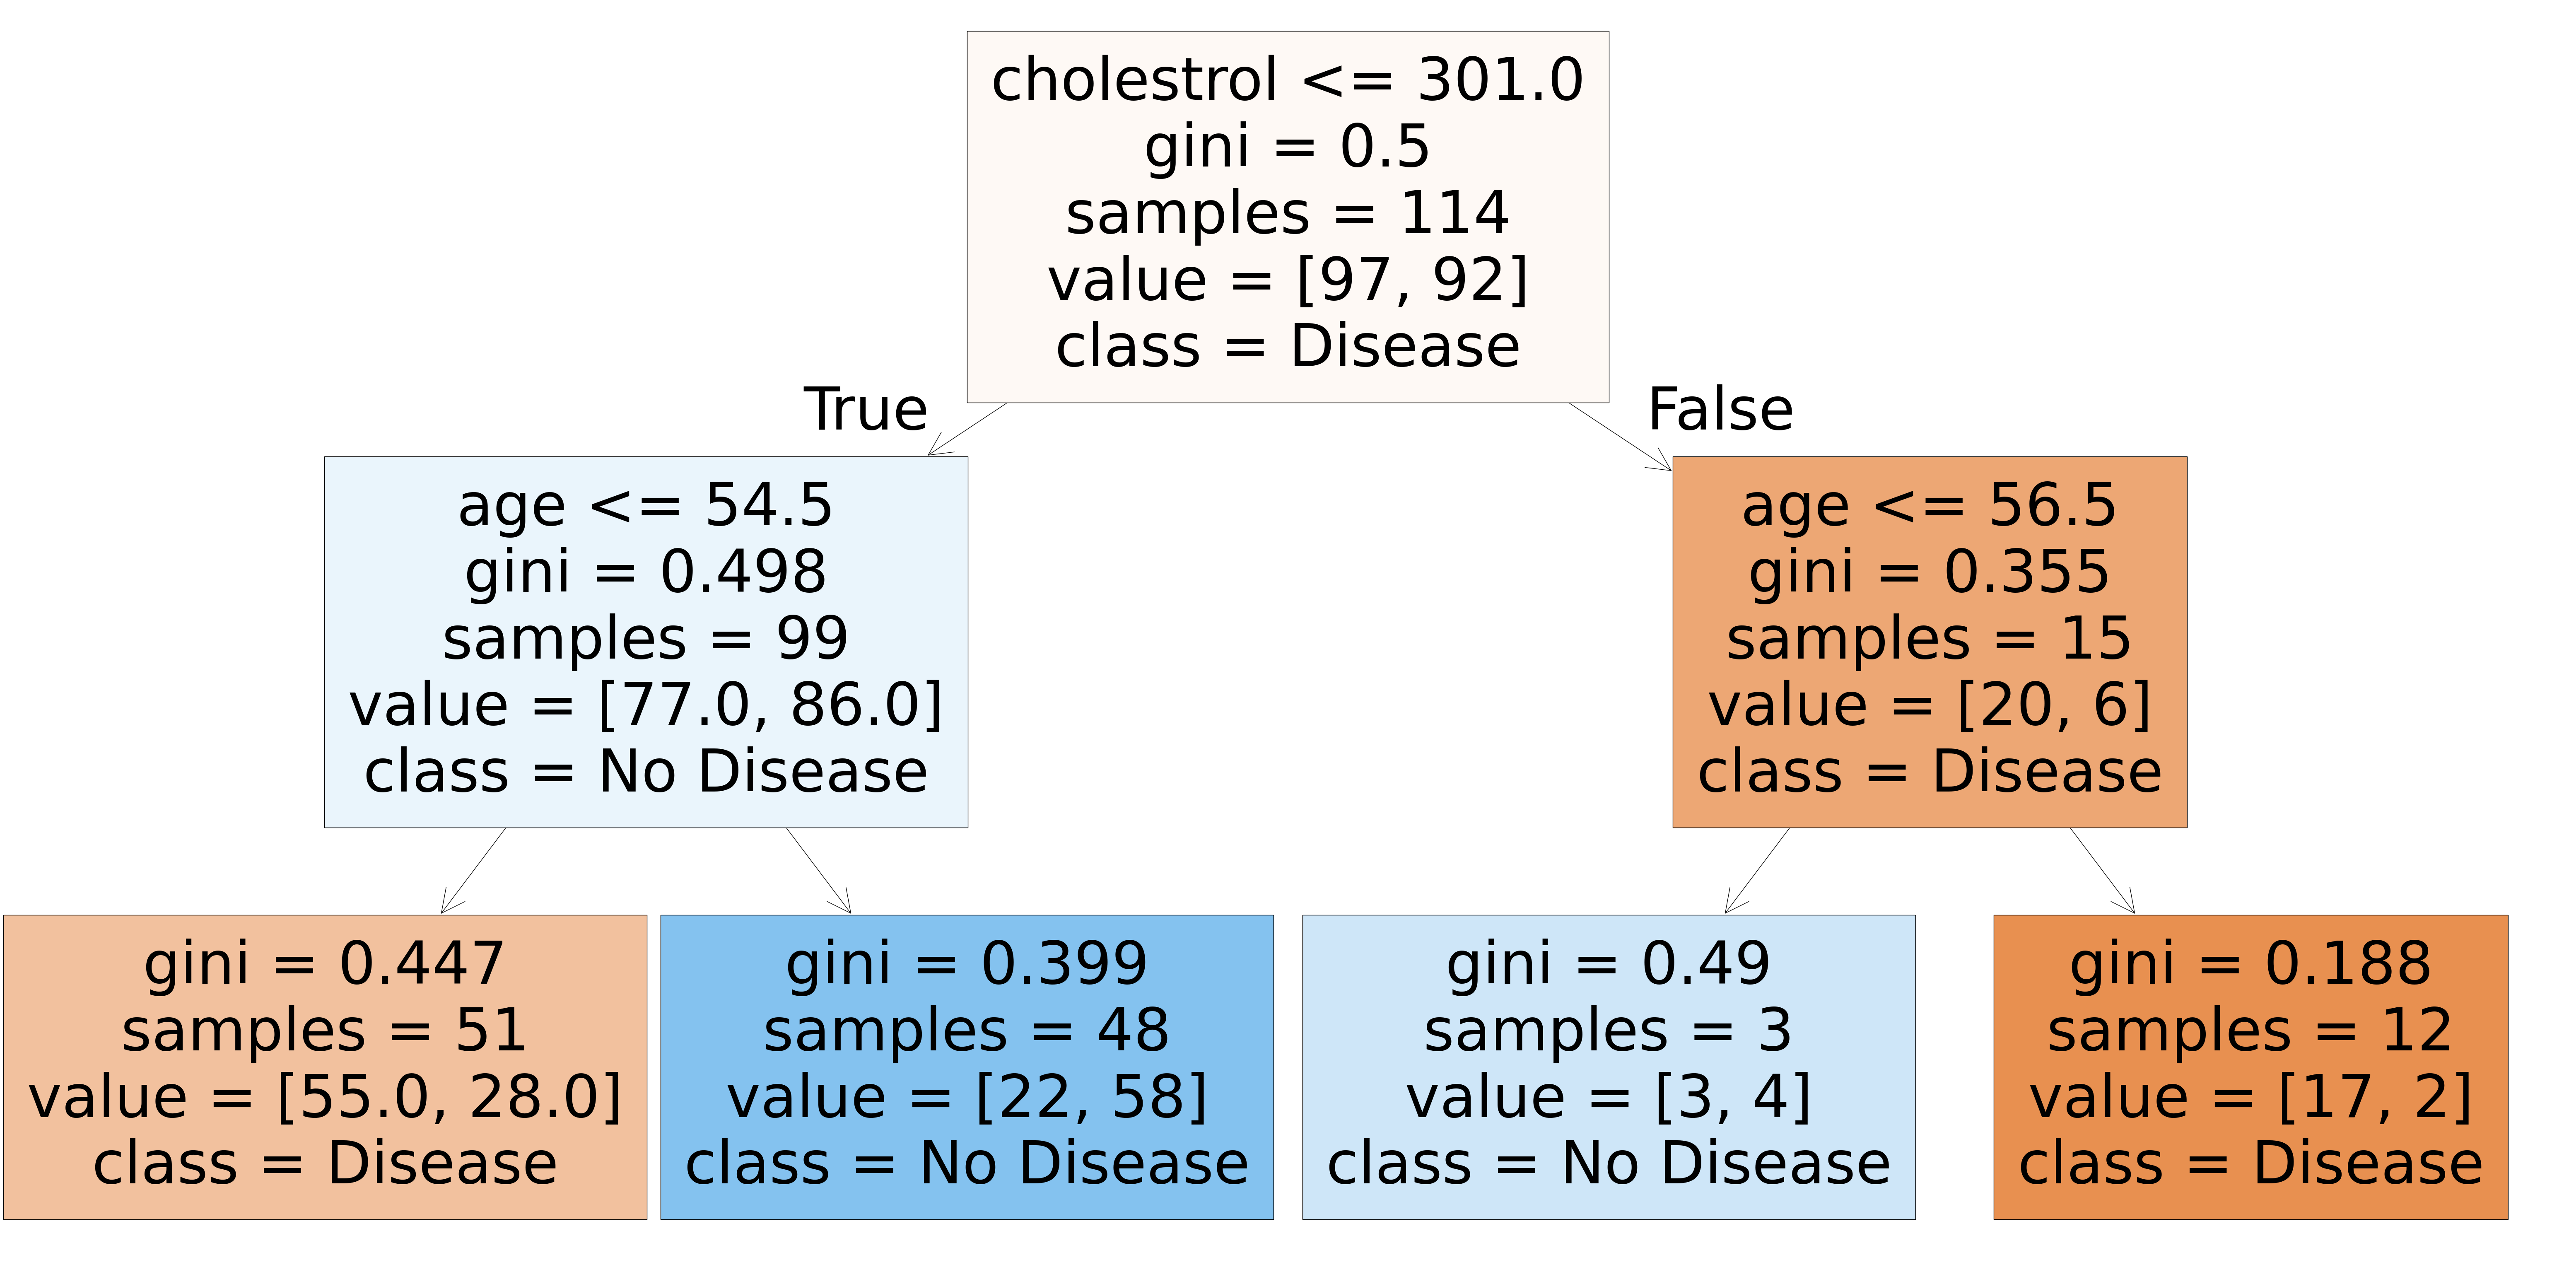

In [20]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[5], feature_names = X.columns,class_names=['Disease', "No Disease"],filled=True);

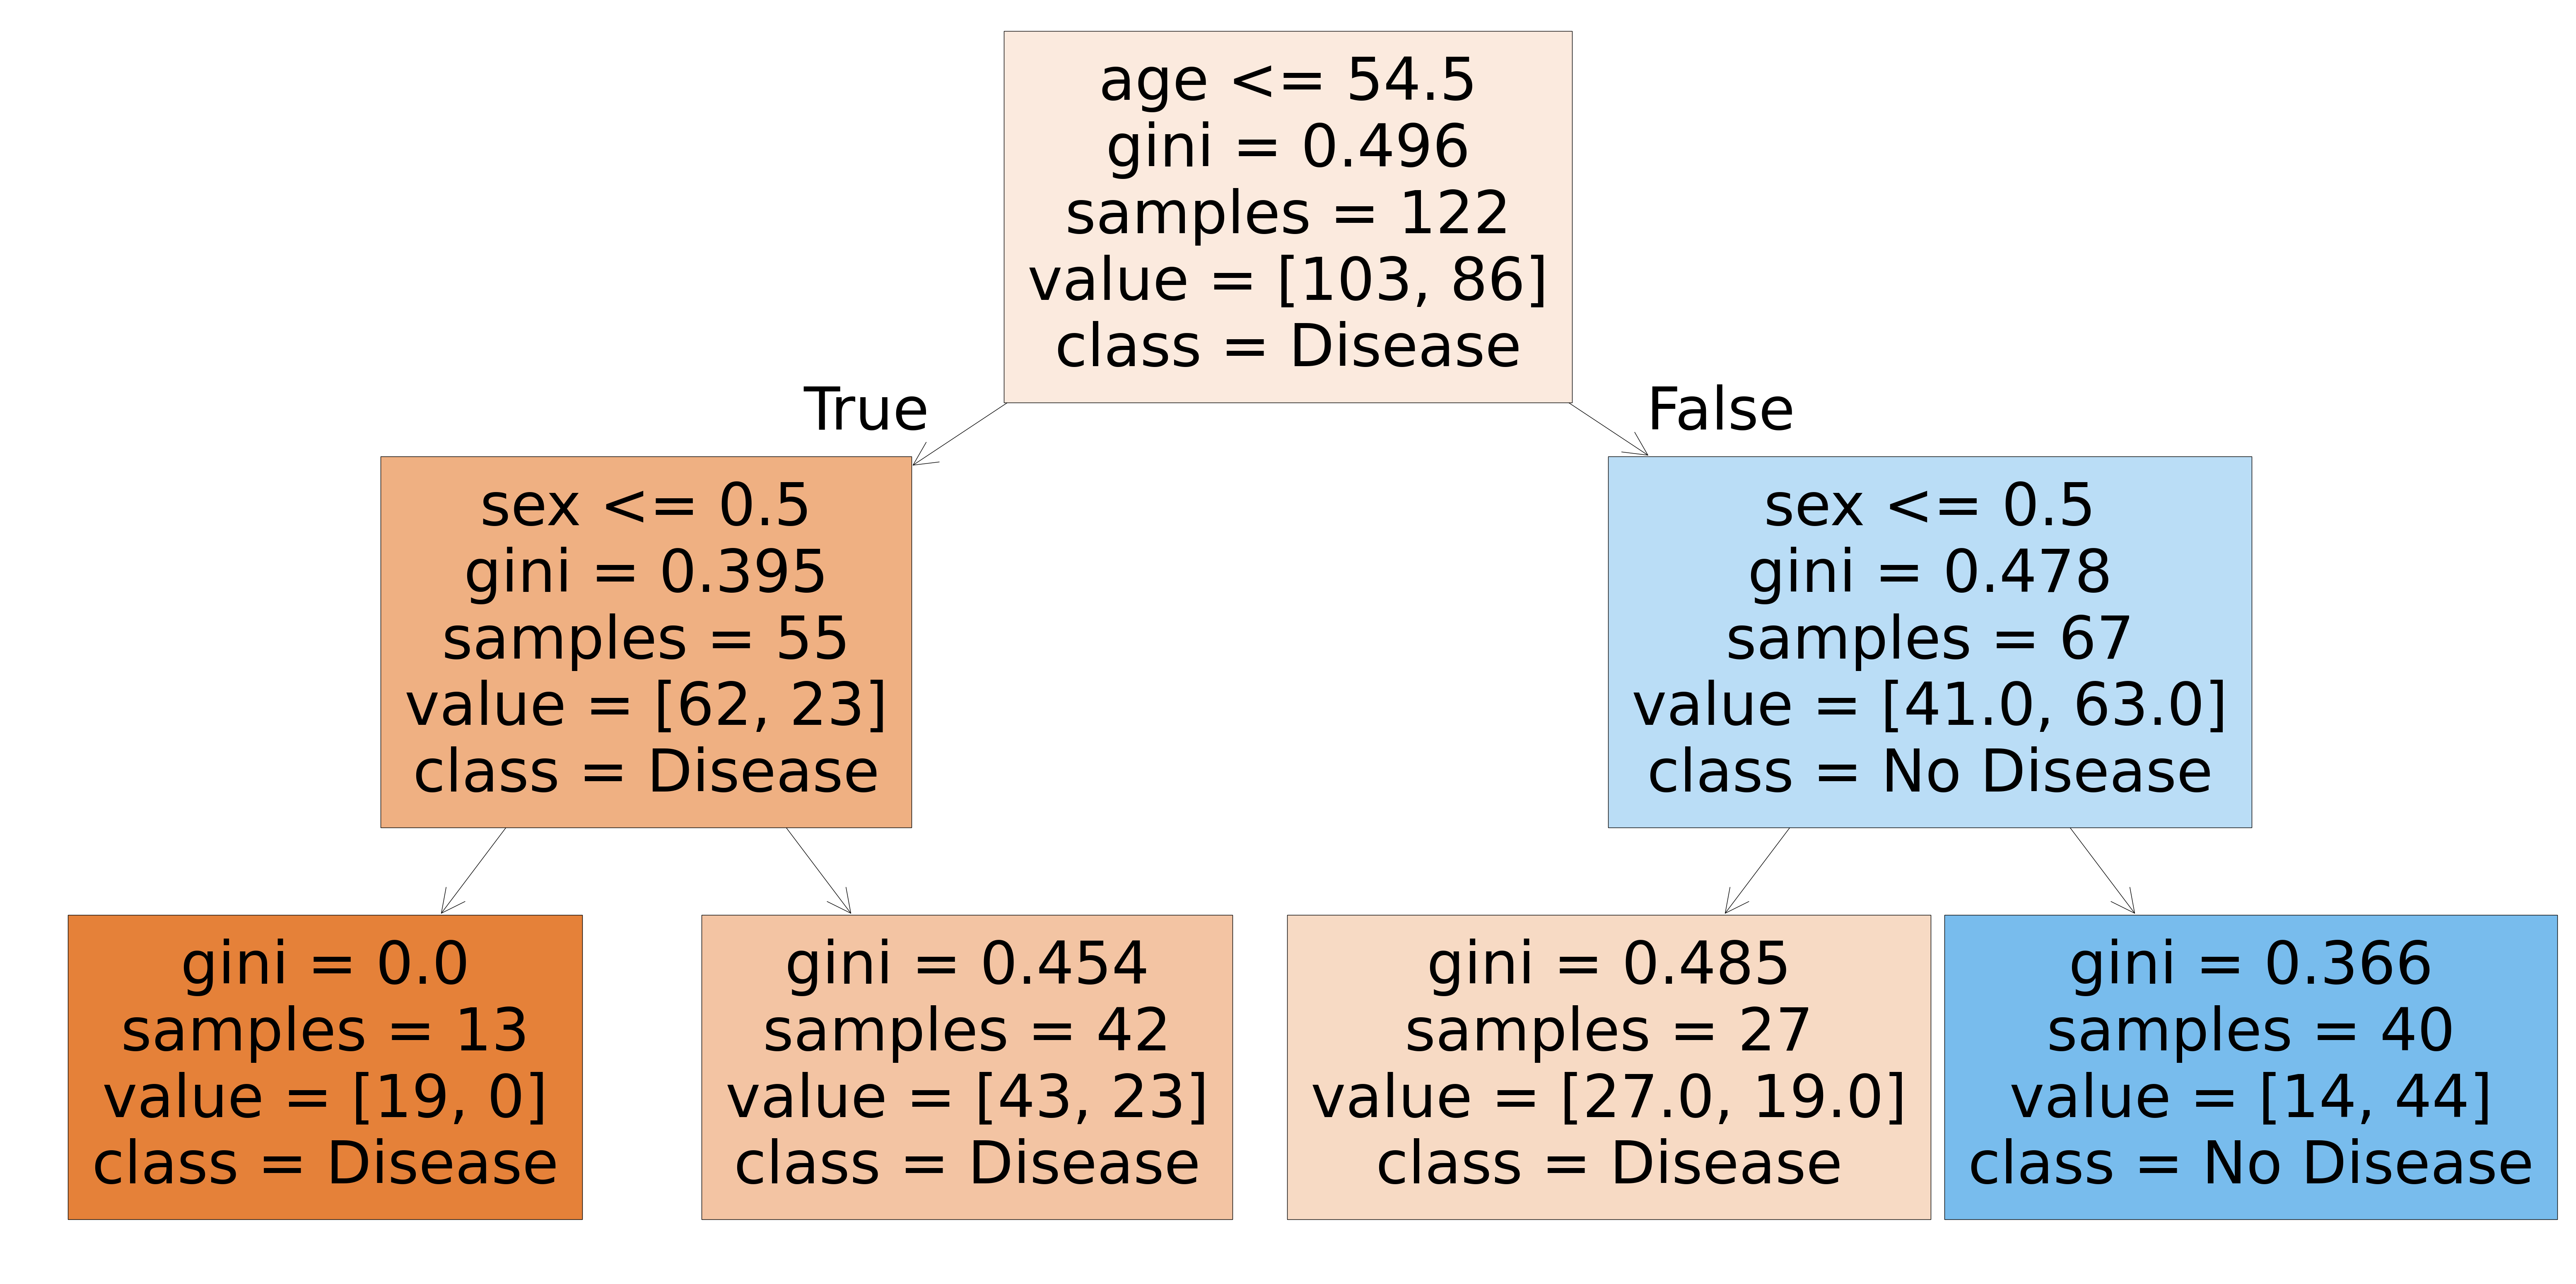

In [21]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[7], feature_names = X.columns,class_names=['Disease', "No Disease"],filled=True);

**Now let’s sort the data with the help of feature importance**

In [22]:
rf_best.feature_importances_

array([0.48126596, 0.19620321, 0.17588317, 0.14664765])

In [23]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})

imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
0,age,0.481266
1,sex,0.196203
2,BP,0.175883
3,cholestrol,0.146648
